In [1]:
import itertools

In [2]:
import SimpleITK as sitk
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from IPython.display import clear_output
import pprint
import os, sys
import pandas_profiling
import sys
import json
from scipy import ndimage
import nibabel as nib 
from pathlib import Path
sys.path.insert(0, str(Path(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\src\registration_metric.pyy').resolve().parent.parent))
from src.eda_nifti import *
from src.registration_metric import *

# task1 체크

In [4]:
raw_img = nib.load(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task1\rawdata\sub-strokecase0002\ses-0001\sub-strokecase0002_ses-0001_dwi.nii.gz')
img = nib.load(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task1\derivatives\sub-strokecase0004\ses-0001\sub-strokecase0004_ses-0001_msk.nii.gz')

In [6]:
img_array = img.get_fdata()

img_array.shape

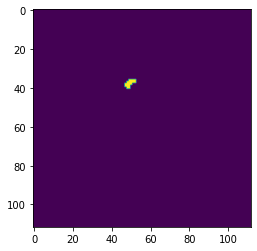

In [7]:
plt.imshow(img_array[:,:,40])

In [8]:
raw_img_array = raw_img.get_fdata()

In [9]:
raw_img_array.shape

(112, 112, 72)

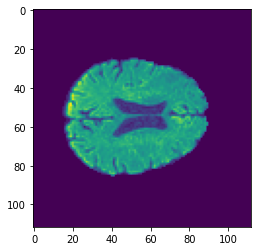

In [25]:
plt.imshow(raw_img_array[:,:,40])

In [10]:
x,y,z = raw_img.shape

In [11]:
center_x, center_y, center_z = int(np.round(x/2)), int(np.round(y/2)), int(np.round(z/2))

In [12]:
bottom = 'bottom   z :center_z    '
top = 'top   z center_z:    '

back = 'back  y  :center_y   '
front = 'front   y   center_y:    '

left = 'left    x   :center_x   '
right = 'right    x    center_x:    '

In [13]:
initial_list = [[left,right], [back,front], [top,bottom]]

In [14]:
combinations = list(itertools.product(*initial_list))

In [15]:
combinations

[('left    x   :center_x   ',
  'back  y  :center_y   ',
  'top   z center_z:    '),
 ('left    x   :center_x   ',
  'back  y  :center_y   ',
  'bottom   z :center_z    '),
 ('left    x   :center_x   ',
  'front   y   center_y:    ',
  'top   z center_z:    '),
 ('left    x   :center_x   ',
  'front   y   center_y:    ',
  'bottom   z :center_z    '),
 ('right    x    center_x:    ',
  'back  y  :center_y   ',
  'top   z center_z:    '),
 ('right    x    center_x:    ',
  'back  y  :center_y   ',
  'bottom   z :center_z    '),
 ('right    x    center_x:    ',
  'front   y   center_y:    ',
  'top   z center_z:    '),
 ('right    x    center_x:    ',
  'front   y   center_y:    ',
  'bottom   z :center_z    ')]

In [16]:
top_back_left = img_array[center_x:, :center_y, center_z:]
top_back_right = img_array [:center_x, :center_y , :center_z ]
top_front_left = img_array [  :center_x,  center_y:,  center_z:  ]
top_front_right =img_array [  :center_x ,  center_y:,   :center_z     ]
bottom_back_left = img_array[  center_x: ,  :center_y,  center_z:  ] 
bottom_back_right = img_array[   center_x: ,  :center_y  ,    center_z        ]
bottmo_front_left = img_array[    center_x:,  center_y:,        center_y:         ]
bottom_front_right = img_array [center_x:  ,    center_y:,    :center_z ]

In [17]:
## 신기한 표현

In [18]:
instance_sample = "3:5"

vars()["instance_sample"]

'3:5'

In [19]:
instance_sample = "3:5"

globals()["instance_sample"]

'3:5'

In [20]:
instance_sample = "3:5"

locals()["instance_sample"]

'3:5'

In [21]:
nifti_anal = NiftiAnalysis()


### 태스크1 데이터프레임 만들기

In [22]:
task1_nifti_files_list = nifti_anal.recursive_find_all_files(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task1', '.nii.gz')

In [24]:
nifti_anal.save_summary_table(task1_nifti_files_list, 'task1.csv', 'task1')

...summary table saved


In [ ]:
pd.read

# 태스크2 데이터프레임 만들기

In [28]:
raw_img = nib.load(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task2\Training\R002\sub-r002s002\ses-1\anat\sub-r002s002_ses-1_space-MNI152NLin2009aSym_label-L_desc-T1lesion_mask.nii.gz')
img = nib.load(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task2\Training\R002\sub-r002s002\ses-1\anat\sub-r002s002_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz')

In [30]:
img_array = img.get_fdata()
img_array.shape

(197, 233, 189)

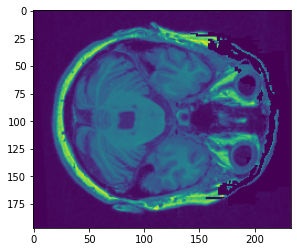

In [31]:
plt.imshow(img_array[:,:,40])